In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
tamanhos_testes = np.linspace(10, 3000, 1990)
tamanhos_testes = np.int32(tamanhos_testes)
tamanhos_testes

array([  10,   11,   13, ..., 2996, 2998, 3000], dtype=int32)

In [3]:
for tamanho in tamanhos_testes:
    for i in range(int(5 * np.log2(tamanho))):
        os.system(f'./bin/main -x -t {tamanho}')

In [4]:
datfram = pd.read_csv('./resultado_experimento.csv', index_col=[0])
datfram

,G_Merge,G_Insertion,G_Bucket,Jarvis
Tamanho,,,,
10,0.00356,0.01422,0.003800,0.00306
10,0.00356,0.00801,0.003570,0.00267
10,0.00354,0.00830,0.003690,0.00257
10,0.00365,0.00809,0.003530,0.00261
10,0.00355,0.00815,0.003550,0.00268
...,...,...,...,...
3000,1.66003,17.57430,0.862972,1.27247
3000,1.48228,16.99530,0.878291,1.29698
3000,1.46938,16.99150,0.874751,1.29238


In [5]:
datfram = datfram.groupby('Tamanho').mean()

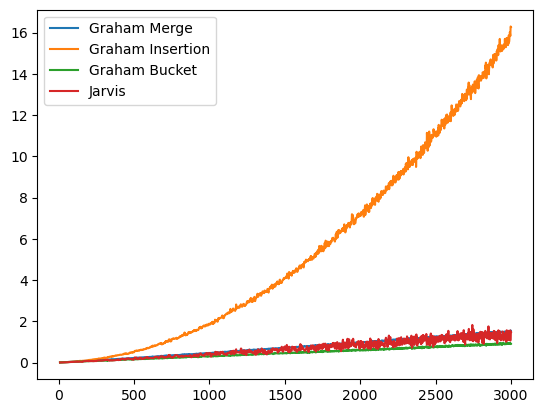

In [6]:
plt.plot(datfram['G_Merge'], label='Graham Merge')
plt.plot(datfram['G_Insertion'], label='Graham Insertion')
plt.plot(datfram['G_Bucket'], label='Graham Bucket')
plt.plot(datfram['Jarvis'], label='Jarvis')
plt.legend()

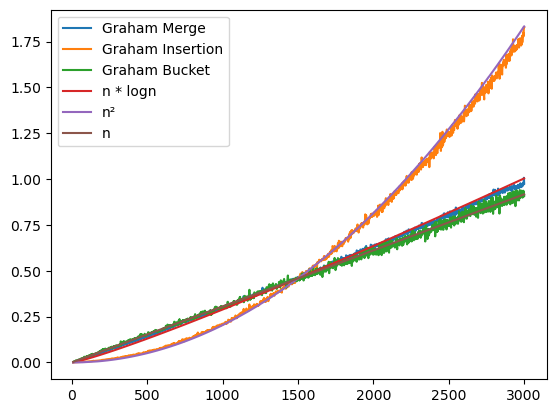

In [7]:
constante_central_nlogn = datfram['G_Bucket'].mean() / (np.log(1501) * 1501)
constante_central_n2 = datfram['G_Bucket'].mean() / 1501 ** 2
constante_central_n = datfram['G_Bucket'].mean() / 1501
constante_central_merge = datfram['G_Bucket'].mean() / datfram['G_Merge'][1501]
constante_central_insertion = datfram['G_Bucket'].mean() / datfram['G_Insertion'][1501]
constante_central_jarvis = datfram['G_Bucket'].mean() / datfram['Jarvis'][1501]

plt.plot(datfram['G_Merge'] * constante_central_merge, label='Graham Merge')
plt.plot(datfram['G_Insertion'] * constante_central_insertion, label='Graham Insertion')
plt.plot(datfram['G_Bucket'], label='Graham Bucket')
plt.plot(np.int32(np.linspace(10, 3000, 1990)), np.linspace(10, 3000, 1990) * np.log(np.linspace(10, 3000, 1990)) * constante_central_nlogn, label='n * logn')
plt.plot(np.int32(np.linspace(10, 3000, 1990)), np.linspace(10, 3000, 1990) ** 2 * constante_central_n2, label='n²')
plt.plot(np.int32(np.linspace(10, 3000, 1990)), np.linspace(10, 3000, 1990) * constante_central_n, label='n')
plt.legend()

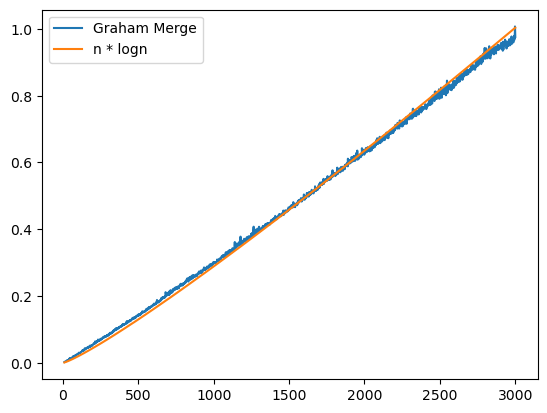

In [8]:
plt.plot(datfram['G_Merge'] * constante_central_merge, label='Graham Merge')
plt.plot(np.int32(np.linspace(10, 3000, 1990)), np.linspace(10, 3000, 1990) * np.log(np.linspace(10, 3000, 1990)) * constante_central_nlogn, label='n * logn')
plt.legend()

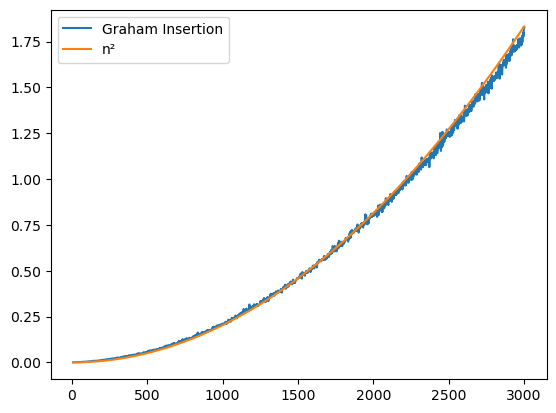

In [9]:
plt.plot(datfram['G_Insertion'] * constante_central_insertion, label='Graham Insertion')
plt.plot(np.int32(np.linspace(10, 3000, 1990)), np.linspace(10, 3000, 1990) ** 2 * constante_central_n2, label='n²')
plt.legend()

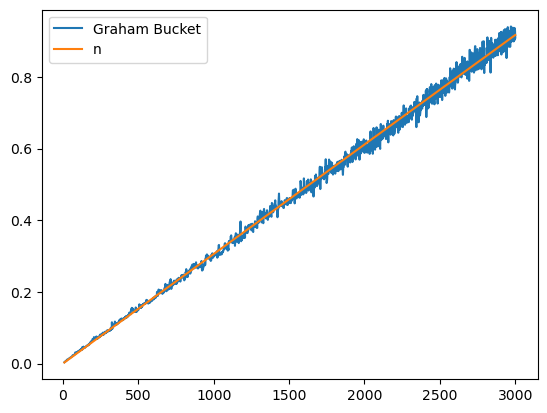

In [10]:
plt.plot(datfram['G_Bucket'], label='Graham Bucket')
plt.plot(np.int32(np.linspace(10, 3000, 1990)), np.linspace(10, 3000, 1990) * constante_central_n, label='n')
plt.legend()

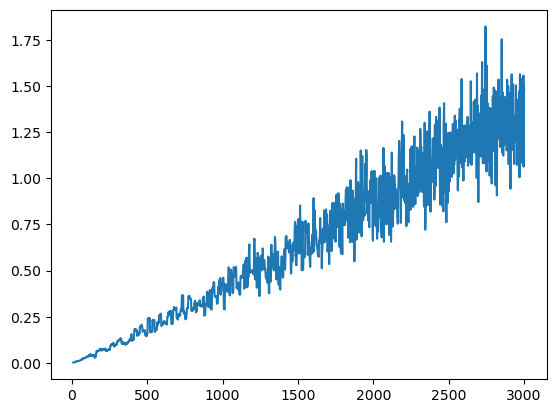

In [11]:
plt.plot(datfram['Jarvis'], label='Jarvis')